<a href="https://colab.research.google.com/github/Hafsa620/PAI-LAB/blob/main/Shoplifitng_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Nov 19 14:09:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   66C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 95.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 134.8 MB/s eta 0:00:00


In [3]:
import ultralytics
print(ultralytics.__version__)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/yolov12/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
8.3.63


In [5]:
!yolo settings


FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
JSONDict("/root/.config/yolov12/settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "/content/datasets",
  "weights_dir": "weights",
  "runs_dir": "runs",
  "uuid": "569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": true,
  "hub": true,
  "mlflow": true,
  "neptune": true,
  "raytune": true,
  "tensorboard": true,
  "wandb": false,
  "vscode_msg": true
}
💡 Learn more about Ultralytics Settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings


In [6]:
!wget https://media.roboflow.com/notebooks/examples/dog.jpeg

--2025-11-19 14:16:06--  https://media.roboflow.com/notebooks/examples/dog.jpeg
Resolving media.roboflow.com (media.roboflow.com)... 34.110.133.209
Connecting to media.roboflow.com (media.roboflow.com)|34.110.133.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106055 (104K) [image/jpeg]
Saving to: ‘dog.jpeg’

dog.jpeg            100%[===================>] 103.57K  --.-KB/s    in 0.001s  

2025-11-19 14:16:06 (142 MB/s) - ‘dog.jpeg’ saved [106055/106055]



100%|██████████| 51.4M/51.4M [00:01<00:00, 36.8MB/s]


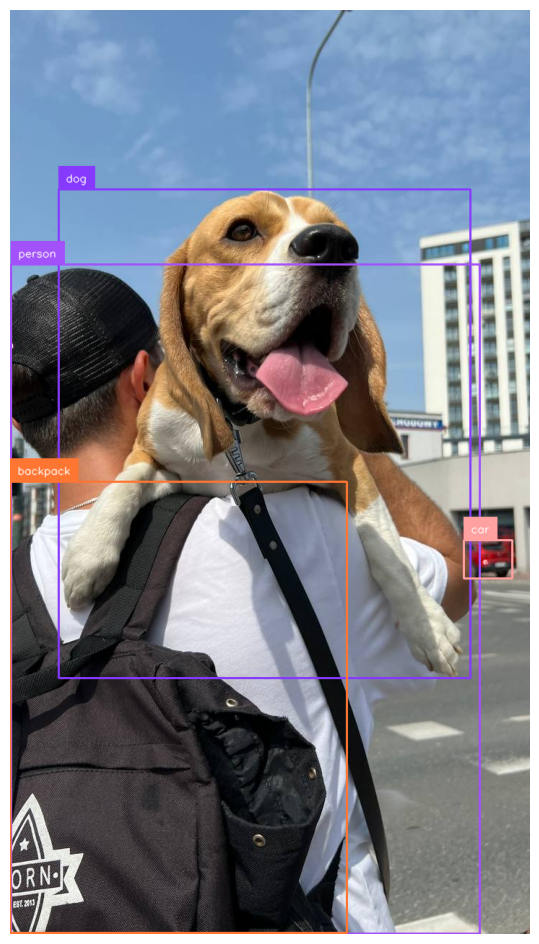

In [7]:
import cv2
from ultralytics import YOLO
import supervision as sv


image_path = '/content/dog.jpeg'
image = cv2.imread(image_path)

model = YOLO('yolov12l.pt')

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [8]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
!cp "/content/drive/MyDrive/Shoplifting-Detection.v2-v2.yolov11.zip" /content/

In [10]:
!unzip /content/Shoplifting-Detection.v2-v2.yolov11.zip -d /content/dataset/


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/labels/cam-pos-video-six_hmMP4PE9_mp4-350_jpg.rf.75db0b55052220eab3463dfc18fed7ee.txt  
  inflating: /content/dataset/train/labels/cam-pos-video-six_hmMP4PE9_mp4-350_jpg.rf.cea532897d9fb2a9073ad8598ea3ea81.txt  
 extracting: /content/dataset/train/labels/cam-pos-video-six_hmMP4PE9_mp4-353_jpg.rf.4c25dd4dec313cdf4ecd687341241f3a.txt  
 extracting: /content/dataset/train/labels/cam-pos-video-six_hmMP4PE9_mp4-353_jpg.rf.ae58f71bb897086910f63c605755f809.txt  
 extracting: /content/dataset/train/labels/cam-pos-video-six_hmMP4PE9_mp4-353_jpg.rf.c467bf6aa69a1324b51ef322f4dba9d6.txt  
  inflating: /content/dataset/train/labels/cam-pos-video-six_hmMP4PE9_mp4-356_jpg.rf.4383cf8ad724f91dfadea4f0f62d3db9.txt  
  inflating: /content/dataset/train/labels/cam-pos-video-six_hmMP4PE9_mp4-356_jpg.rf.7843e9ec8ab30a05b020ec6f8ab600b5.txt  
  inflating: /content/dataset/train/labels/cam-pos-video-six_hmMP4PE9_mp4-356_jpg

In [12]:
!cat /content/dataset/data.yaml


train: /content/dataset/train/images
val: /content/dataset/valid/images
test: /content/dataset/test/images

nc: 2
names: ['Shoplifting', 'normal']

roboflow:
  workspace: stevens-institute-of-technology-xjltl
  project: shoplifting-detection-oxvwp
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/stevens-institute-of-technology-xjltl/shoplifting-detection-oxvwp/dataset/2

In [14]:
from ultralytics import YOLO

model = YOLO('yolov12s.yaml')

results = model.train(
    data='/content/dataset/data.yaml',
    epochs=50,
    batch=16,            # batch size
    imgsz=640,           # image size
    lr0=0.001,            # learning rate
    device='0'           # GPU device
)

New https://pypi.org/project/ultralytics/8.3.229 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12s.yaml, data=/content/dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames

100%|██████████| 755k/755k [00:00<00:00, 30.5MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1      9344  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2, 1, 2]          
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1     37120  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2, 1, 4]        
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  2    677120  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 4]        
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.26M/5.26M [00:00<00:00, 98.5MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train/labels... 6188 images, 17 backgrounds, 0 corrupt: 100%|██████████| 6188/6188 [00:02<00:00, 2361.26it/s]

train: WARNING ⚠️ /content/dataset/train/images/teenage-girl-shoplifting-in-department-store-model-re-enactment-bob-daemmrich-2B7W4RX_jpg.rf.5cb1554ae2b935d9712979df144928a7.jpg: 1 duplicate labels removed


train: New cache created: /content/dataset/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 18, len(boxes) = 7465. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/valid/labels... 864 images, 2 backgrounds, 0 corrupt: 100%|██████████| 864/864 [00:00<00:00, 1180.59it/s]


val: New cache created: /content/dataset/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.71G       2.94      3.784      3.517         27        640: 100%|██████████| 387/387 [03:47<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:15<00:00,  1.69it/s]


                   all        864        952      0.104      0.245     0.0737     0.0197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.84G      2.292      3.148      2.732         31        640: 100%|██████████| 387/387 [03:22<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.39it/s]

                   all        864        952      0.135      0.201      0.127     0.0432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.67G      2.023      2.774      2.392         26        640: 100%|██████████| 387/387 [03:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.48it/s]

                   all        864        952      0.278       0.25      0.134     0.0655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.66G      1.818       2.51      2.159         31        640: 100%|██████████| 387/387 [03:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.51it/s]

                   all        864        952      0.404      0.388       0.25      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.84G      1.662      2.272      1.984         30        640: 100%|██████████| 387/387 [03:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.53it/s]

                   all        864        952       0.45      0.441      0.325      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.81G      1.548      2.104      1.883         23        640: 100%|██████████| 387/387 [03:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.41it/s]

                   all        864        952      0.333      0.443      0.312      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.83G      1.452       1.99        1.8         23        640: 100%|██████████| 387/387 [03:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.40it/s]

                   all        864        952       0.41      0.536      0.338       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.83G      1.396      1.898      1.739         28        640: 100%|██████████| 387/387 [03:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.42it/s]

                   all        864        952      0.472      0.533      0.417      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.65G      1.327      1.806      1.683         31        640: 100%|██████████| 387/387 [03:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.43it/s]

                   all        864        952      0.448      0.585      0.477      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.65G      1.297      1.742      1.653         32        640: 100%|██████████| 387/387 [03:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.47it/s]

                   all        864        952      0.483      0.529      0.475      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.83G       1.26      1.702      1.626         35        640: 100%|██████████| 387/387 [03:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.47it/s]

                   all        864        952      0.478      0.518      0.446      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.83G      1.216      1.641      1.586         30        640: 100%|██████████| 387/387 [03:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.45it/s]

                   all        864        952      0.495      0.581       0.48       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.66G       1.19      1.603      1.565         41        640: 100%|██████████| 387/387 [03:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.45it/s]

                   all        864        952      0.533       0.61      0.525      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.64G      1.152      1.552      1.538         29        640: 100%|██████████| 387/387 [03:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.45it/s]

                   all        864        952      0.534      0.598      0.511      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.83G      1.128      1.509      1.517         34        640: 100%|██████████| 387/387 [03:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.47it/s]

                   all        864        952      0.576      0.613      0.568       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.83G      1.121      1.482      1.511         32        640: 100%|██████████| 387/387 [03:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.49it/s]

                   all        864        952      0.589        0.6      0.576      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.81G      1.105      1.447      1.494         25        640: 100%|██████████| 387/387 [03:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.54it/s]

                   all        864        952      0.609      0.649      0.626      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.64G      1.089      1.424      1.484         23        640: 100%|██████████| 387/387 [03:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.62it/s]

                   all        864        952       0.63      0.618      0.625      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.83G      1.051      1.371      1.452         25        640: 100%|██████████| 387/387 [03:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.65it/s]

                   all        864        952      0.583       0.69      0.633      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.83G       1.05      1.361      1.454         26        640: 100%|██████████| 387/387 [03:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.61it/s]

                   all        864        952      0.709      0.667      0.704      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.66G      1.035      1.313      1.437         28        640: 100%|██████████| 387/387 [03:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.63it/s]

                   all        864        952      0.644      0.734      0.699      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.64G      1.014      1.282      1.419         29        640: 100%|██████████| 387/387 [03:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.61it/s]

                   all        864        952      0.703      0.658      0.696      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.83G     0.9932      1.273      1.408         40        640: 100%|██████████| 387/387 [03:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.64it/s]

                   all        864        952      0.726      0.698      0.726      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.83G     0.9815      1.235      1.395         31        640: 100%|██████████| 387/387 [03:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.64it/s]

                   all        864        952      0.712      0.713      0.695      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.81G     0.9659      1.212      1.386         34        640: 100%|██████████| 387/387 [03:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.63it/s]

                   all        864        952      0.734      0.726       0.77      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.64G     0.9518       1.19      1.375         25        640: 100%|██████████| 387/387 [03:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.58it/s]

                   all        864        952      0.828      0.687      0.767      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.83G     0.9418      1.159      1.361         35        640: 100%|██████████| 387/387 [03:21<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.56it/s]

                   all        864        952      0.755      0.712      0.744      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.83G     0.9372      1.136      1.361         34        640: 100%|██████████| 387/387 [03:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.53it/s]

                   all        864        952       0.76      0.696      0.772      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.66G     0.9207      1.112      1.341         31        640: 100%|██████████| 387/387 [03:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.50it/s]

                   all        864        952      0.795      0.733      0.783      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.64G     0.9066      1.097      1.329         20        640: 100%|██████████| 387/387 [03:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.43it/s]

                   all        864        952      0.798       0.72      0.783      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.67G     0.8898      1.061      1.317         36        640: 100%|██████████| 387/387 [03:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.44it/s]

                   all        864        952        0.8      0.738      0.785      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.83G     0.8935       1.06      1.324         29        640: 100%|██████████| 387/387 [03:21<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.41it/s]

                   all        864        952      0.807      0.773      0.803      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.81G     0.8855      1.044      1.316         30        640: 100%|██████████| 387/387 [03:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.45it/s]

                   all        864        952      0.813      0.765       0.82      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.65G     0.8703      1.006      1.306         36        640: 100%|██████████| 387/387 [03:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.44it/s]

                   all        864        952      0.804      0.746      0.814      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.83G     0.8641      1.004        1.3         32        640: 100%|██████████| 387/387 [03:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.45it/s]

                   all        864        952      0.801      0.754      0.812      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.67G      0.854     0.9813      1.288         29        640: 100%|██████████| 387/387 [03:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.45it/s]

                   all        864        952      0.841      0.763      0.826      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.83G     0.8379     0.9538      1.283         29        640: 100%|██████████| 387/387 [03:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.46it/s]

                   all        864        952      0.854      0.748      0.833      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.65G     0.8222     0.9395      1.269         32        640: 100%|██████████| 387/387 [03:20<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.49it/s]

                   all        864        952      0.827      0.767      0.842      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.83G       0.83     0.9378      1.271         26        640: 100%|██████████| 387/387 [03:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.48it/s]

                   all        864        952      0.863       0.74      0.821      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.83G     0.8141     0.9225      1.263         25        640: 100%|██████████| 387/387 [03:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.46it/s]

                   all        864        952      0.877      0.759      0.825      0.624


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.66G     0.7621     0.7278      1.255         12        640: 100%|██████████| 387/387 [03:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.45it/s]

                   all        864        952      0.864      0.773      0.839      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.65G     0.7336      0.666      1.227         14        640: 100%|██████████| 387/387 [03:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.46it/s]

                   all        864        952      0.905      0.741      0.839      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.83G     0.7153     0.6491      1.213         15        640: 100%|██████████| 387/387 [03:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.47it/s]

                   all        864        952      0.877      0.773      0.846      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.83G     0.7031     0.6185      1.199         18        640: 100%|██████████| 387/387 [03:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.48it/s]

                   all        864        952      0.894      0.761       0.84      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.66G     0.6888     0.6099      1.189         14        640: 100%|██████████| 387/387 [03:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.50it/s]

                   all        864        952      0.896      0.775      0.847      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.65G     0.6778     0.5951      1.182         15        640: 100%|██████████| 387/387 [03:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.47it/s]

                   all        864        952      0.896      0.794       0.85       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.83G      0.671     0.5763      1.176         15        640: 100%|██████████| 387/387 [03:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.46it/s]

                   all        864        952       0.89      0.793       0.86      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.83G     0.6621     0.5712      1.168         14        640: 100%|██████████| 387/387 [03:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.46it/s]

                   all        864        952      0.919      0.777      0.857      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.66G     0.6492     0.5573      1.158         16        640: 100%|██████████| 387/387 [03:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.46it/s]

                   all        864        952      0.888      0.795      0.851      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.65G      0.643     0.5367      1.155         13        640: 100%|██████████| 387/387 [03:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.47it/s]

                   all        864        952      0.903      0.794      0.862      0.664



50 epochs completed in 2.956 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 18.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 18.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 376 layers, 9,074,982 parameters, 0 gradients, 19.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:12<00:00,  2.10it/s]


                   all        864        952      0.904      0.795      0.863      0.664
           Shoplifting        571        576      0.914      0.667      0.761      0.531
                normal        295        376      0.894      0.922      0.964      0.796
Speed: 0.2ms preprocess, 8.5ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train


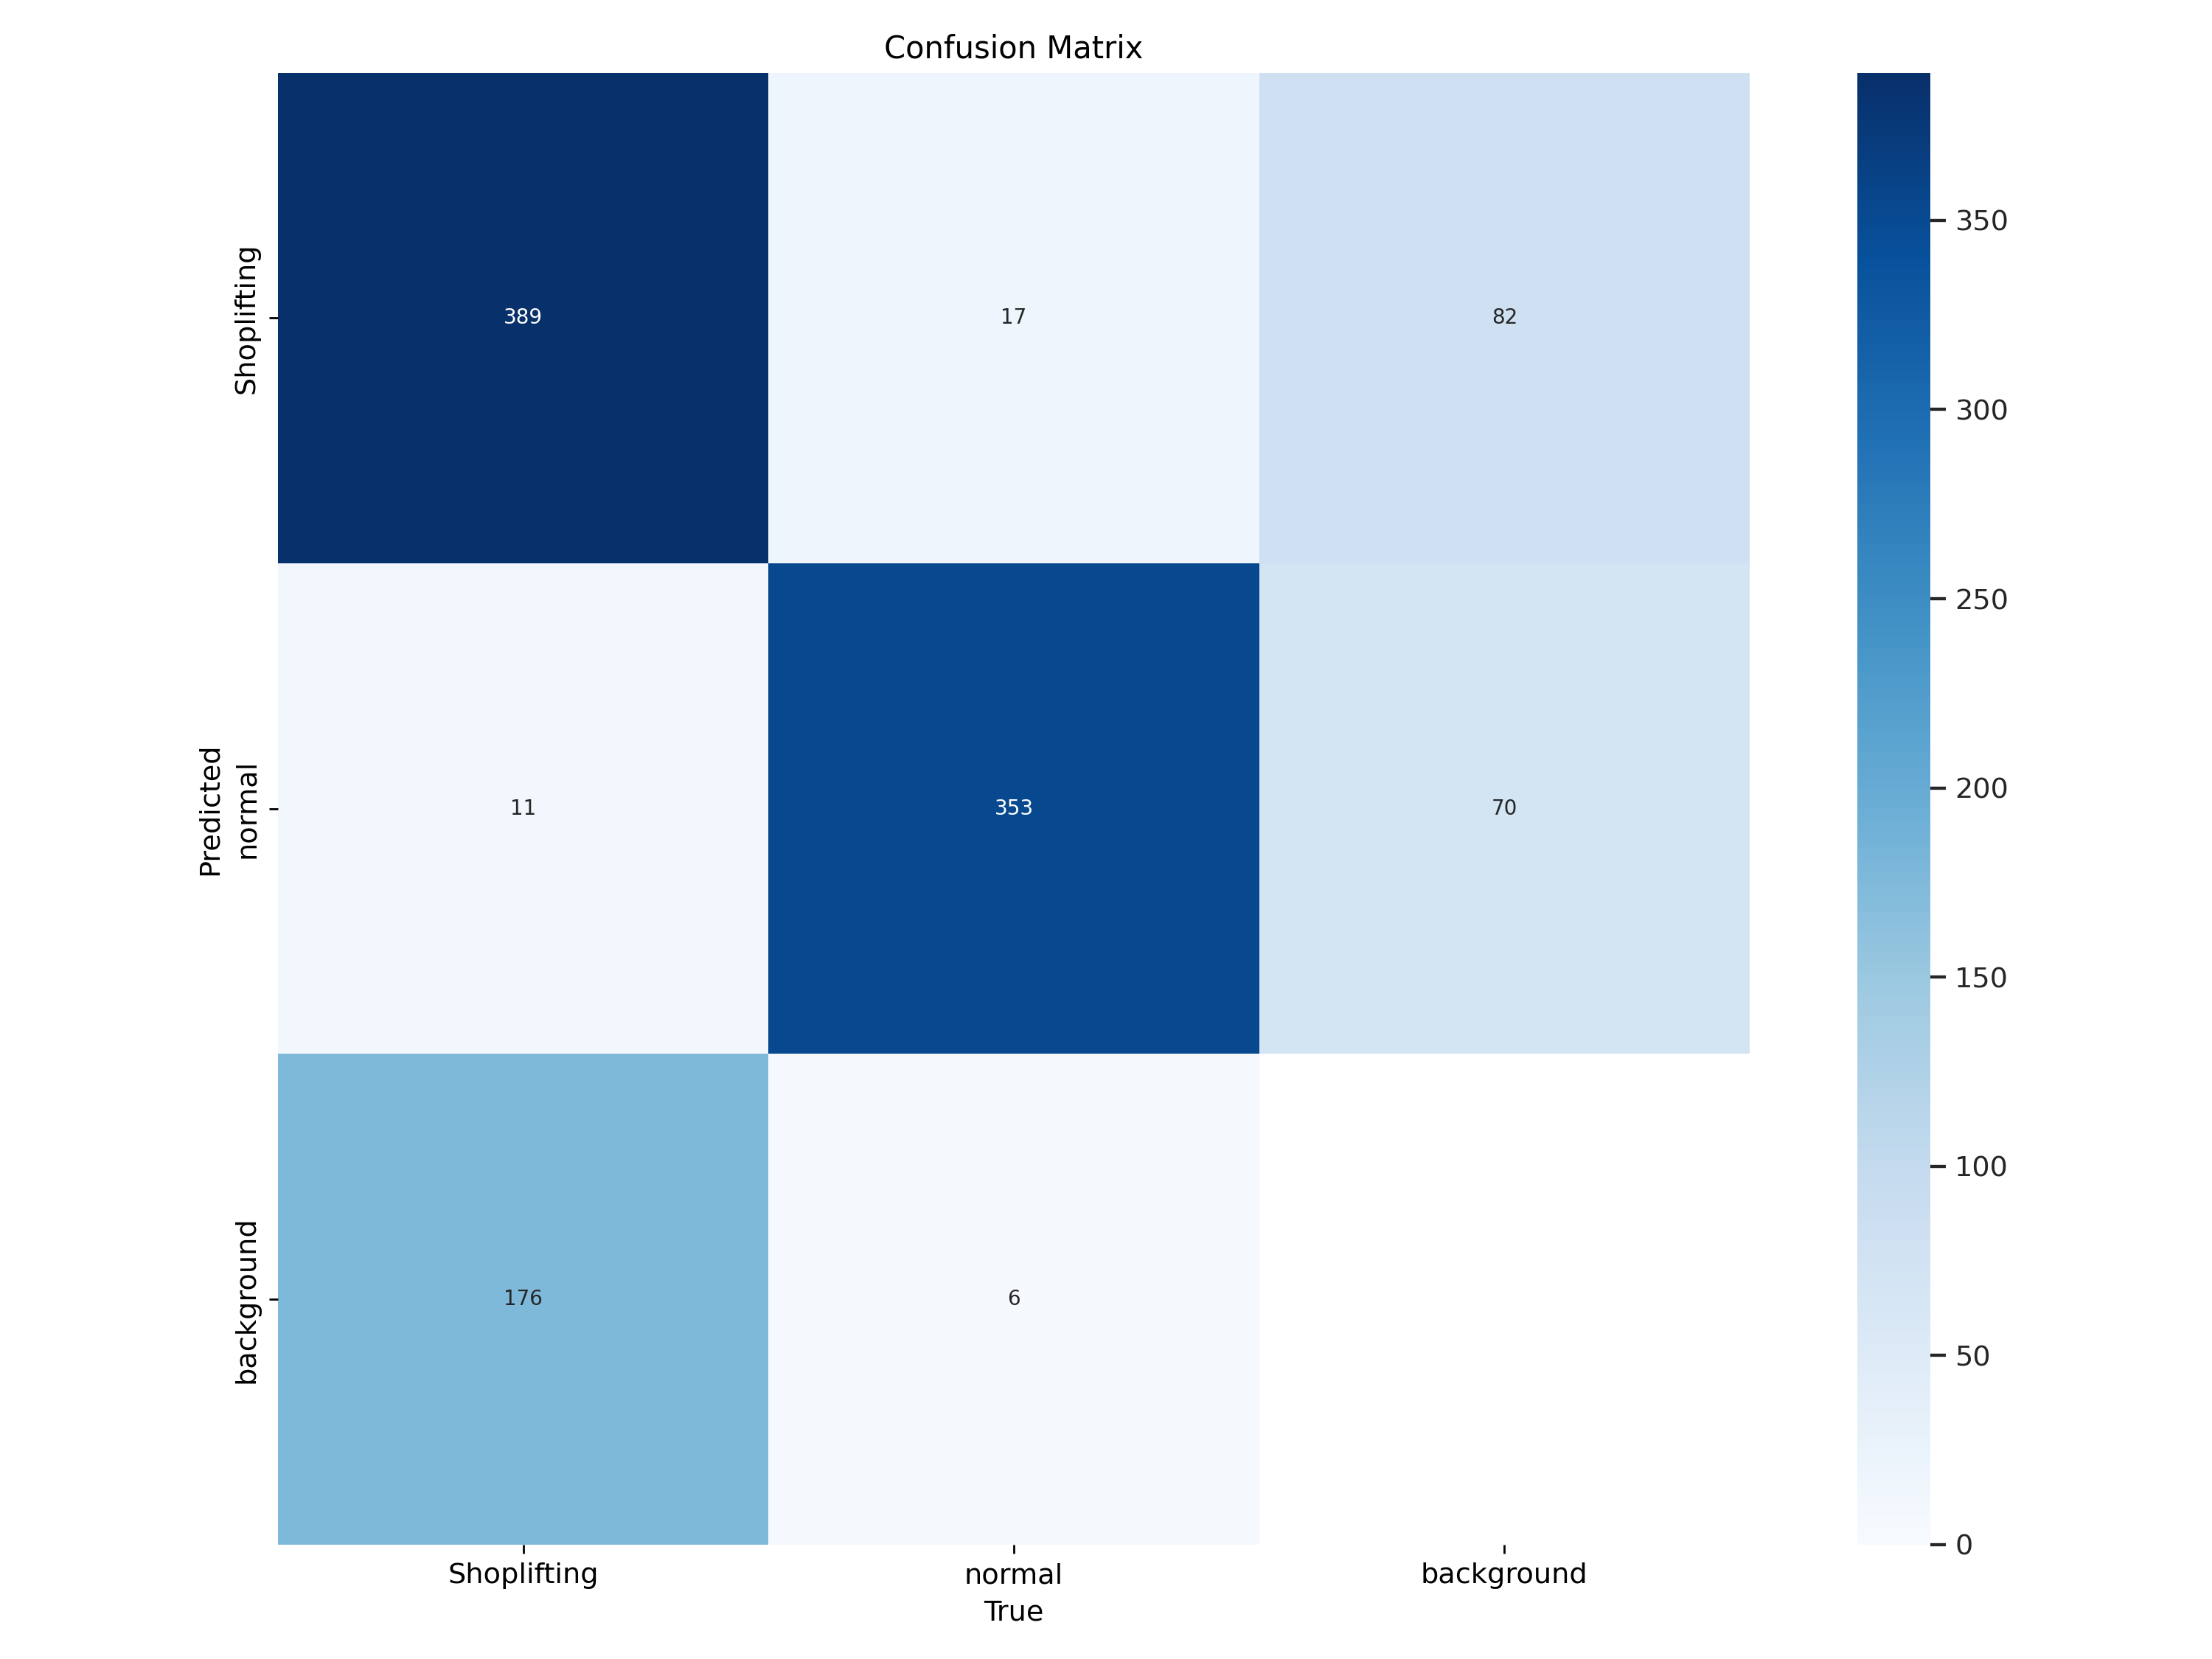

In [18]:
from IPython.display import Image

Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=500)

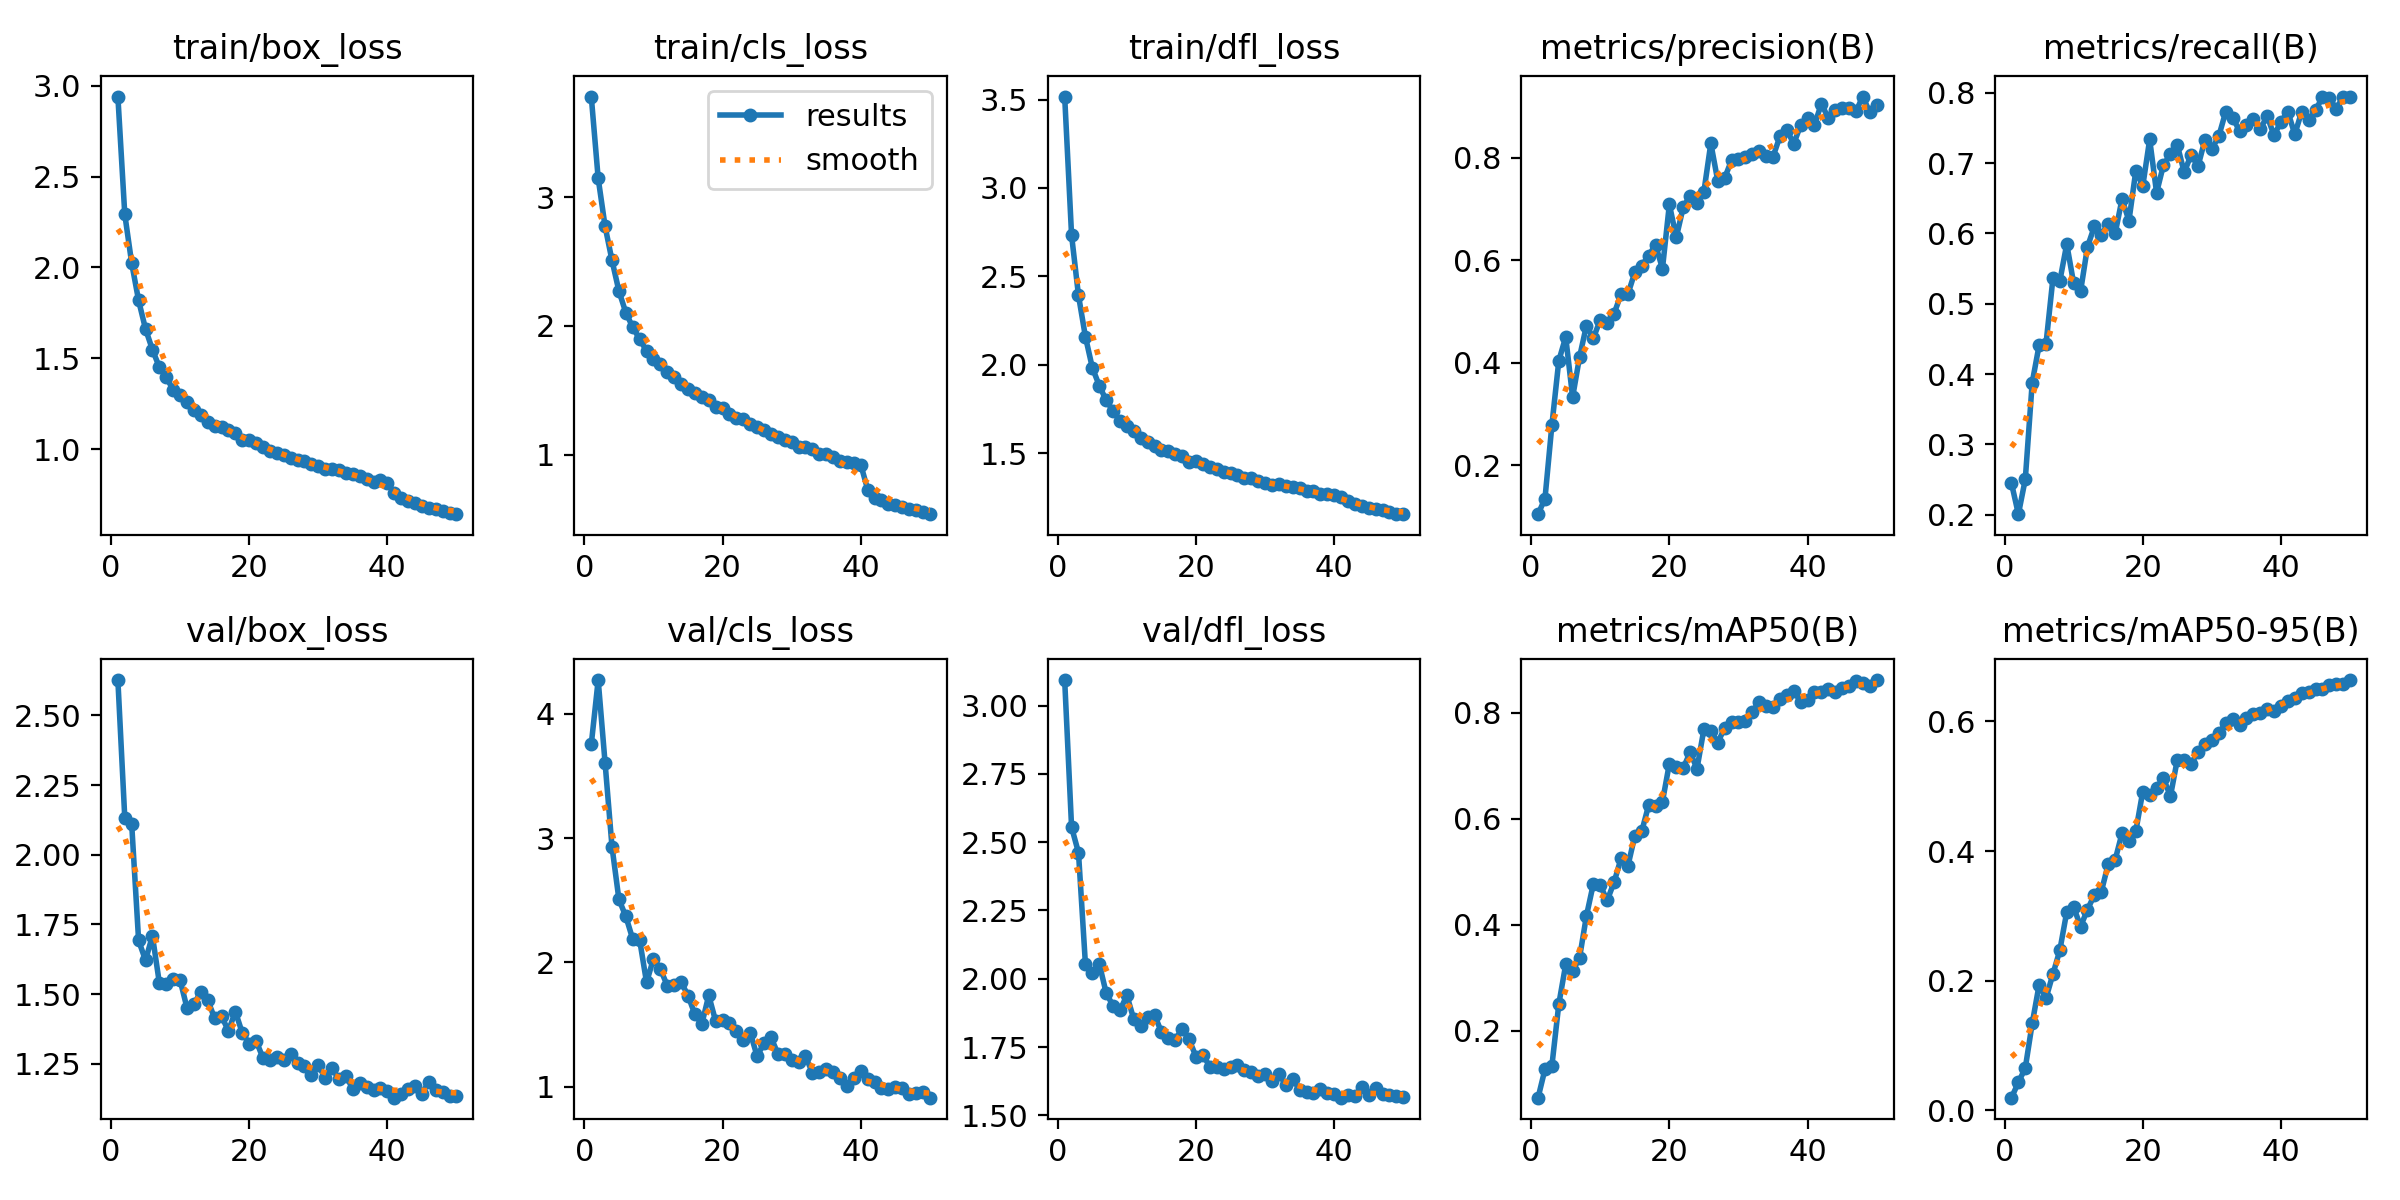

In [19]:
from IPython.display import Image

Image(filename=f'/content/runs/detect/train/results.png', width=1000)

In [22]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"/content/dataset/test/images",
    annotations_directory_path=f"/content/dataset/test/labels",
    data_yaml_path=f"/content/dataset/data.yaml"
)

ds.classes

['Shoplifting', 'normal']

In [23]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/content/runs/detect/train/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [24]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.3428619834388737
mAP 50 0.44663065682614145
mAP 75 0.37868751291891106


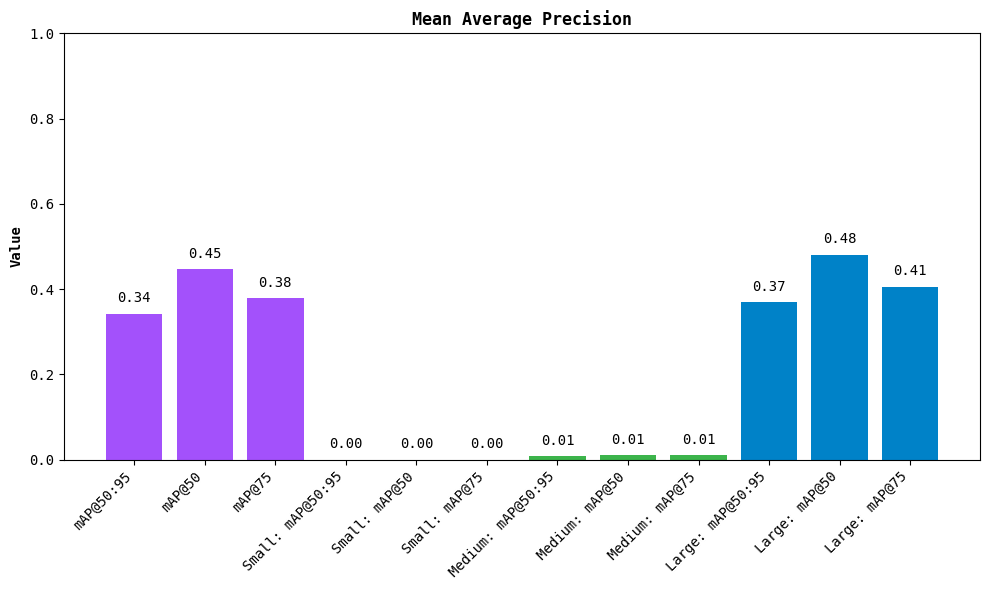

In [25]:
map.plot()

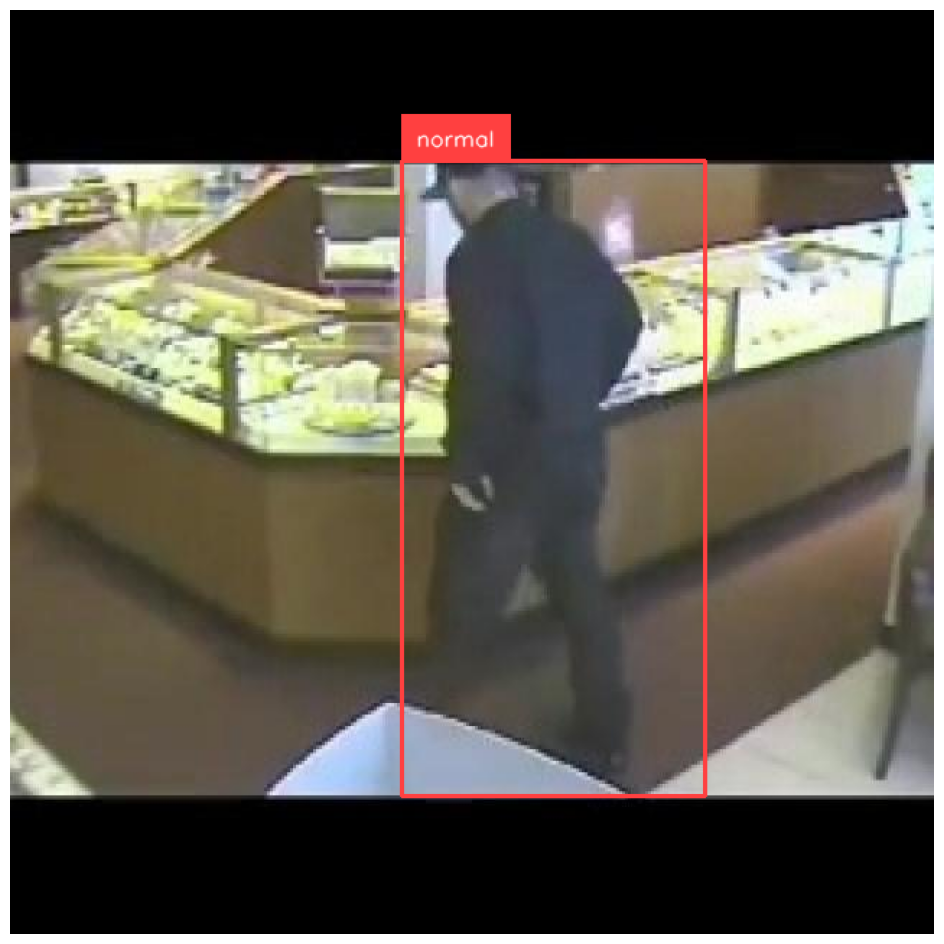

In [26]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

inference

In [31]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")


In [32]:
results = model.predict(
    source='/content/demo1.mp4',  # your input video
    conf=0.3,                     # confidence threshold
    save=True                      # automatically saves annotated video
)




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/436) /content/demo1.mp4: 384x640 1 Shoplifting, 19.9ms
video 1/1 (frame 2/436) /content/demo1.mp4: 384x640 1 Shoplifting, 22.4ms
video 1/1 (frame 3/436) /content/demo1.mp4: 384x640 1 Shoplifting, 19.3ms
video 1/1 (frame 4/436) /content/demo1.mp4: 384x640 1 Shoplifting, 23.2ms
video 1/1 (frame 5/436) /content/demo1.mp4: 384x640 1 Shoplifting, 18.3ms
video 1/1 (frame 6/436) /content/demo1.mp4: 384x640 1 Shoplifting, 20.1ms
video 1/1 (f

In [41]:
last_model=YOLO("/content/runs/detect/train/weights/last.pt")
results = last_model.predict(
    source="/content/dataset/test/images/cam-pos-video-four_o4QmOkay_mp4-143_jpg.rf.614c839c6cff166090f044c37676866b.jpg",  # your image file
    conf=0.3,                         # confidence threshold
    save=False                        # do NOT save the output
)



image 1/1 /content/dataset/test/images/cam-pos-video-four_o4QmOkay_mp4-143_jpg.rf.614c839c6cff166090f044c37676866b.jpg: 640x640 1 normal, 22.4ms
Speed: 2.1ms preprocess, 22.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


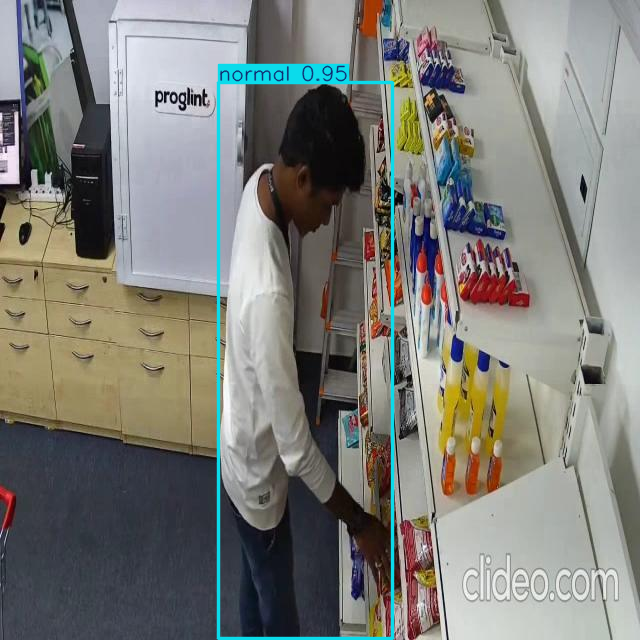

In [42]:
results[0].show()  # This opens a window or inline display (e.g., in Colab/Jupyter)


In [44]:
import shutil

# Path to the folder you want to zip
folder_path = '/content/runs'

# Path for the output zip file
zip_path = '/content/runs.zip'

# Create a zip file
shutil.make_archive(base_name='/content/runs', format='zip', root_dir=folder_path)


'/content/runs.zip'

In [46]:
from google.colab import files

# Download the zip file
files.download("/content/runs.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
from ultralytics import YOLO
import cv2
import os

# -----------------------------
# CONFIGURATION
# -----------------------------
MODEL_PATH = "/content/runs/detect/train/weights/last.pt"
INPUT_VIDEO = "/content/demo1.mp4"
OUTPUT_VIDEO = "output_tracked.mp4"
CONF_THRESHOLD = 0.3
TRACKER = "bytetrack.yaml"

# Colors for known classes
CLASS_COLORS = {
    "normal": (0, 255, 0),       # Green
    "shoplifting": (0, 0, 255)   # Red
}

# -----------------------------
# LOAD MODEL
# -----------------------------
model = YOLO(MODEL_PATH)

# -----------------------------
# VALIDATE INPUT VIDEO
# -----------------------------
if not os.path.exists(INPUT_VIDEO):
    raise FileNotFoundError(f"{INPUT_VIDEO} not found!")

cap = cv2.VideoCapture(INPUT_VIDEO)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

out = cv2.VideoWriter(OUTPUT_VIDEO, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

# -----------------------------
# PROCESS VIDEO STREAM
# -----------------------------
print("[INFO] Starting tracking...")
results = model.track(source=INPUT_VIDEO, tracker=TRACKER, conf=CONF_THRESHOLD, stream=True)

frame_count = 0
for r in results:
    frame_count += 1
    frame = r.orig_img.copy()

    if hasattr(r, "boxes") and r.boxes is not None and len(r.boxes) > 0:
      xyxy = r.boxes.xyxy.cpu().numpy()
      cls_ids = r.boxes.cls.cpu().numpy()
      track_ids = r.boxes.id.cpu().numpy() if (hasattr(r.boxes, "id") and r.boxes.id is not None) else [0] * len(xyxy)

      for i in range(len(xyxy)):
        box = xyxy[i]
        cls_id = int(cls_ids[i])
        track_id = int(track_ids[i]) if track_ids[i] is not None else 0

        x1, y1, x2, y2 = [int(coord) for coord in box]
        cls_name = model.names.get(cls_id, "unknown")
        color = CLASS_COLORS.get(cls_name, (255, 255, 255))

        label = f"{cls_name} ID:{track_id}" if cls_name == "shoplifting" else f"Person ID:{track_id}"
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
    out.write(frame)

    # Optional: show progress
    if frame_count % 50 == 0:
        print(f"[INFO] Processed {frame_count} frames...")

# -----------------------------
# CLEANUP
# -----------------------------
cap.release()
out.release()
print(f"[INFO] Done! Saved tracked video as {OUTPUT_VIDEO}")

FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
[INFO] Starting tracking...

video 1/1 (frame 1/436) /content/demo1.mp4: 384x640 1 Shoplifting, 56.6ms
video 1/1 (frame 2/436) /content/demo1.mp4: 384x640 1 Shoplifting, 14.7ms
video 1/1 (frame 3/436) /content/demo1.mp4: 384x640 1 Shoplifting, 16.9ms
video 1/1 (frame 4/436) /content/demo1.mp4: 384x640 1 Shoplifting, 14.6ms
video 1/1 (frame 5/436) /content/demo1.mp4: 384x640 1 Shoplifting, 13.8ms
video 1/1 (frame 6/436) /content/demo1.mp4: 384x640 1 Shoplifting, 13.8ms
video 1/1 (frame 7/436) /content/demo1.mp4: 384x640 1 Shoplifting, 13.8ms
video 1/1 (frame 8/436) /content/demo1.mp4: 384x640 1 Shoplifting, 14.4ms
video 1/1 (frame 9/436) /content/demo1.mp4: 384x640 1 Shoplifting, 22.9ms
video 1/1 (frame 10/436) /content/demo1.mp4: 384x640 1 Shoplifting, 13.4ms
video 1/1 (frame 11/436) /content/demo1.mp4: 384x640 1 Shoplifting, 14.1ms
video 1/1 (frame 12/436) /content/demo1.mp4: 384x640 1 Shoplift